In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\nidhi\OneDrive\Desktop\Student_Pridiction\stud.csv")

In [3]:
print("Student performance dataset:")
df.shape
# Data set has eight differnt fields  with one thousand rows

Student performance dataset:


(1000, 8)

In [4]:
print("Student performance dataset:")
display (df)

Student performance dataset:


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 2.2 Dataset information

- gender : sex of students : (Male/female)
- race/ethnicity : ethnicity of students : (Group A, B,C, D,E)
- parental level of education : parents' top education level : (high school, associate's degree, bachelor's degree, some college, master's degree)
- lunch : indicating the fact of having lunch before test (standard or free/reduced) 
- test preparation course : Status of test prepration course as completed or not completed before the actual test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Missing values
- Duplicates
- data type
- Unique values for each column
- Data Statistics
- Different categorical values for each of the related filed

In [5]:
print("Student performance dataset:")
df.isna().sum()

Student performance dataset:


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Insight
- Fantastic data quality with not even a single feature having  null value , had we encountered any null values than
- we would have applied steps to replace the null values with mean, mode or median
- for the numerical cases 'MEAN'in normal case and 'MEDIAN' in case of extreme outliers
- For categorial cases would have  used 'MODE'

In [6]:
print("Student performance dataset:")
df.duplicated().sum()

Student performance dataset:


0

Insight
- No duplicate records , Indication of a good data set
- here checking for exact duplicate , any case found was supposed to be deleted
- In case of duplicate with different timesamp , would have used the recent one
- In case of partial duplicate like typos , whitespaces , I would have cleaned data and than verifified for duplicacy again

In [7]:
print("Student performance dataset:")
df.info()

Student performance dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Insight
- We can observe three numerical and five categorial fields in this case

In [8]:
print("Student performance dataset:")
df.nunique()

Student performance dataset:


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
print("Student performance dataset:")
df.describe()

Student performance dataset:


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### Exploring Data

In [10]:
# Define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
# Exploring different unique values within each categorial fields

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### Adding columns for "Total Score" and "Average"

In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
# Analyzing stdeunt scores for Highs and Lows

# Number of students with full marks:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

print("\n")

# Number of students with less than 0r equal to 20 marks:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE) : KDE shows how the data is distributed in a smooth curve ,it helps to clearly see distribution shape, even when the bars overlap 

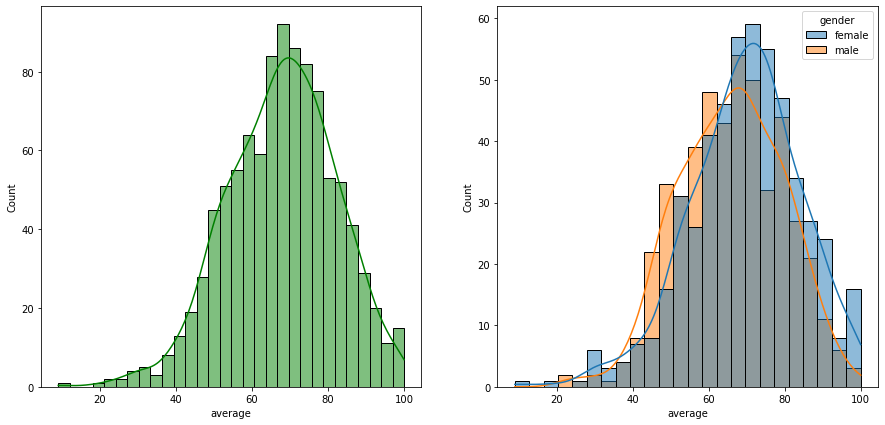

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

#####  Insights
- This shows that Both genders have a similar distribution (bell-shaped, normally distributed
- Female students tend to perform well then male students.

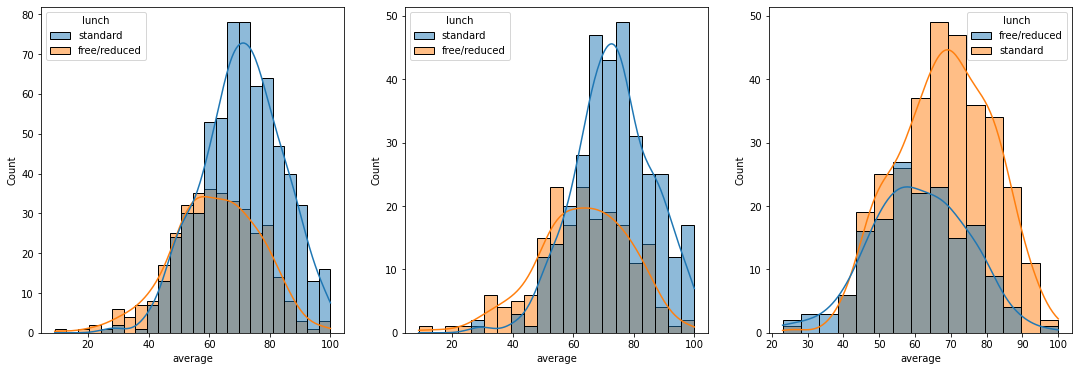

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

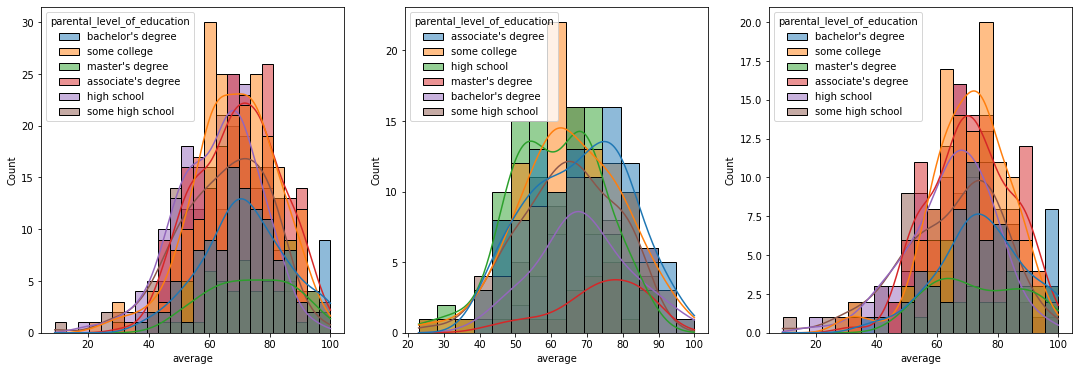

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

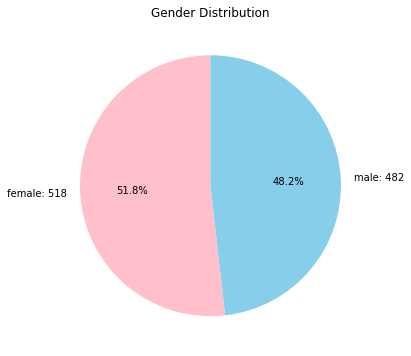

In [17]:

plt.figure(figsize=(6, 6))

counts = df['gender'].value_counts()
labels = counts.index
sizes = counts.values
total = sum(sizes)
color = ['pink','skyblue']
custom_labels = [f'{label}: {count}' for label, count in zip(labels, sizes)]

plt.pie(sizes, colors = color, labels = custom_labels,  startangle=90, autopct = '%1.1f%%')
plt.title('Gender Distribution')
plt.show()


#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

Text(0.5, 1.0, 'Race/Ethnicity')

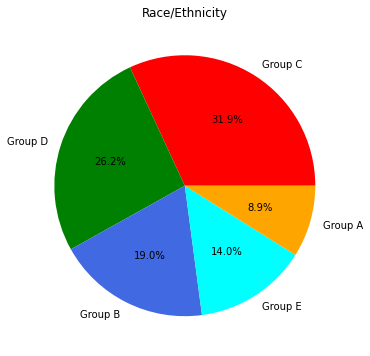

In [18]:
plt.figure(figsize=(6, 6))
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'royalblue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Race/Ethnicity')

#####  Insights
- Number students are greatest in Group C

Text(0.5, 1.0, 'Lunch')

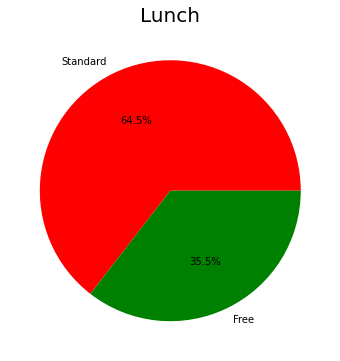

In [19]:
plt.figure(figsize=(6, 6))
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Lunch', fontsize = 20)


#####  Insights
- Number of students who have standard lunch are greater

(-1.25, 1.25, -1.25, 1.25)

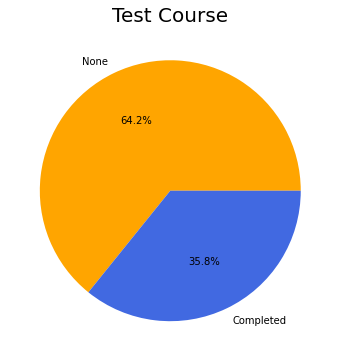

In [20]:
plt.figure(figsize=(6, 6))
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['orange','royalblue']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

#####  Insights
- Number of students who have not enrolled in any test preparation course is greater

(-1.25, 1.25, -1.25, 1.25)

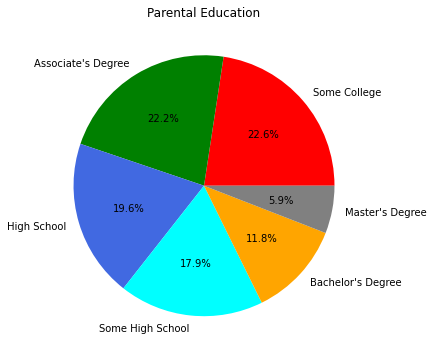

In [21]:
plt.figure(figsize=(6, 6))
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'royalblue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Parental Education')
plt.axis('off')


#####  Insights
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
- A majority of parents have an education level below a Bachelor's degree
- Only about 17.7% (Bachelor’s + Master’s) have a college degree or higher
- The population is skewed slightly toward mid-level education like high school, some college, and associate degrees.

In [22]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


#####  Insights
- Math performance is better in male and for anyy other caes females are leading

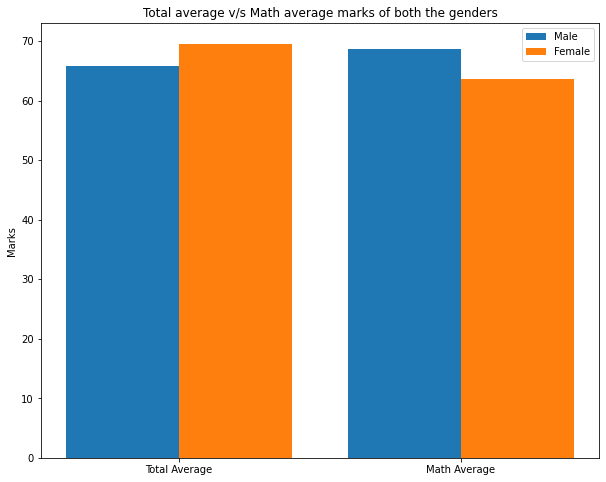

In [23]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders")
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

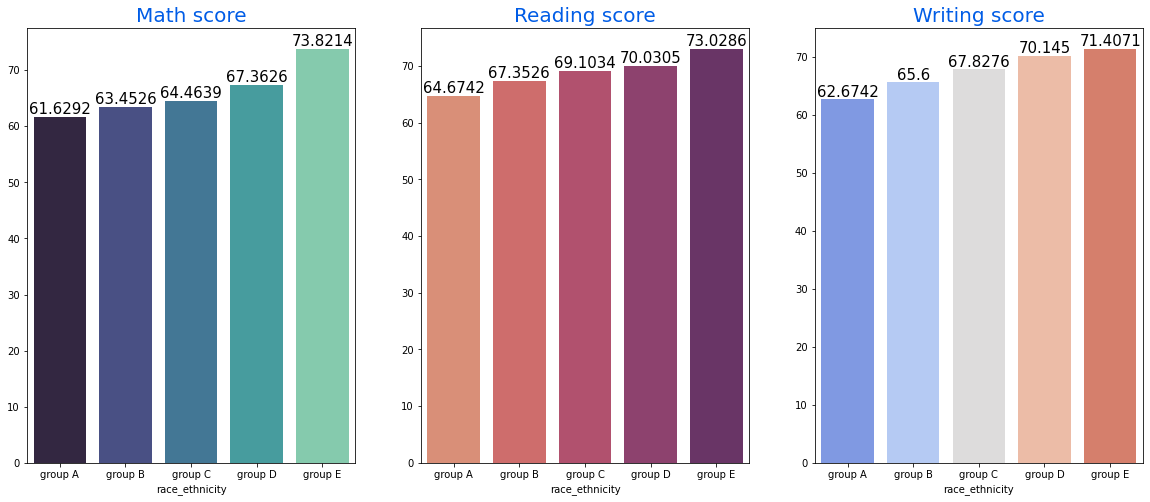

In [24]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)



#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Socioeconomic status has a direct relatationship with Study score in all subject areas

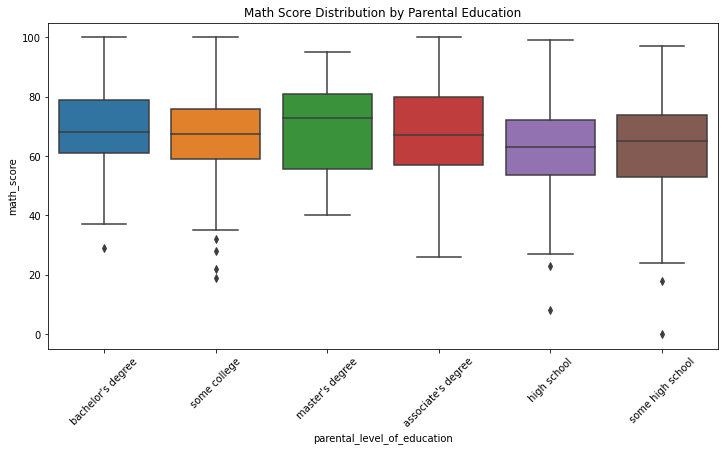

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='parental_level_of_education', y='math_score', data=df)
plt.title("Math Score Distribution by Parental Education")
plt.xticks(rotation=45)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### BIVARIATE ANALYSIS (  impact of lunch type intake on student's performance ? )

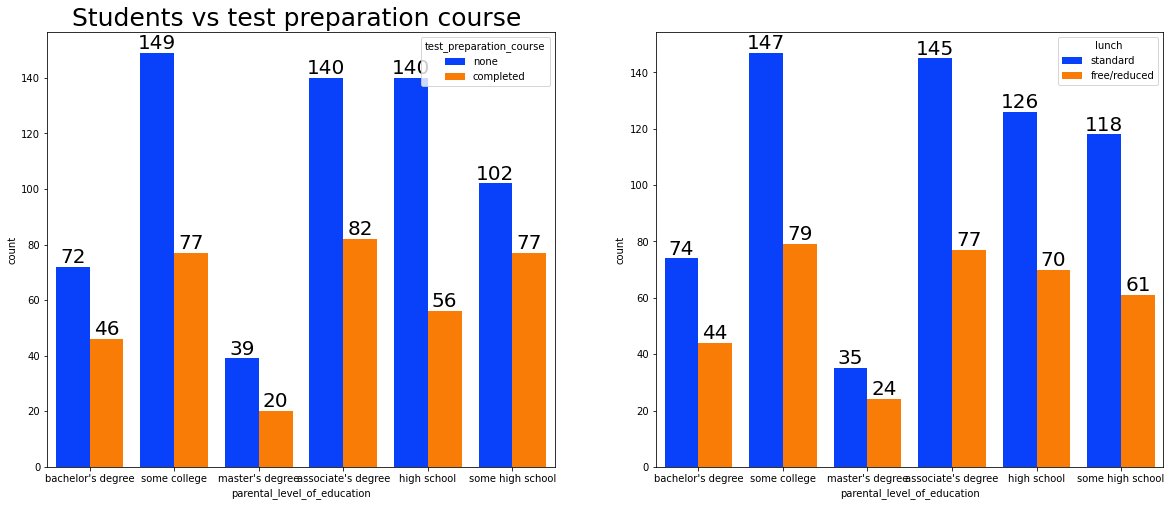

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### BIVARIATE ANALYSIS ( Impact of Test prepration course on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

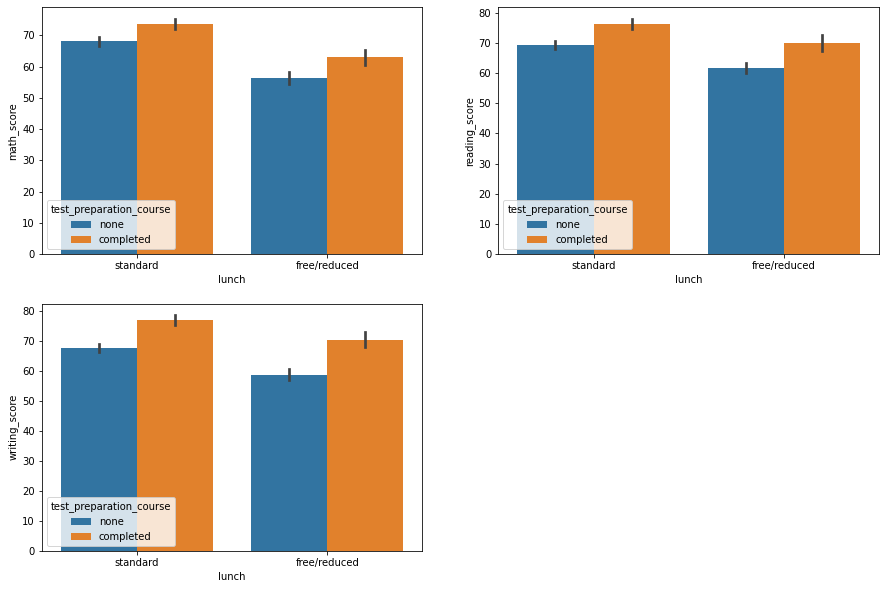

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

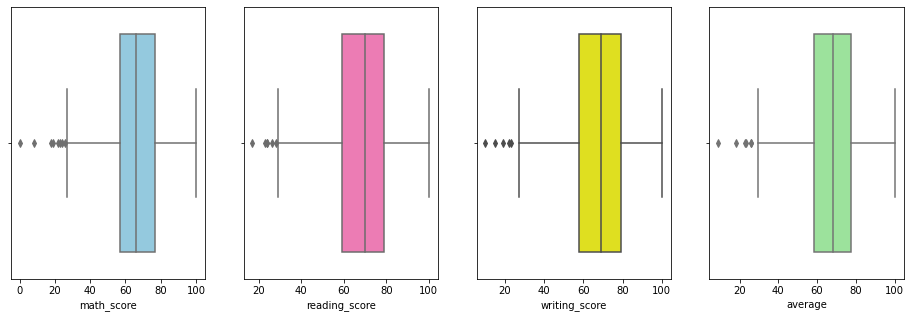

In [28]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Insights 
- All four plots show left-side outliers, which means there are students who scored unusually low in those categories.
- There are no high-end (right-side) outliers, suggesting the high scores are more consistent and within expected range.
- Most outliers are present in the math score plot,This suggests greater variability and more frequent underperformance in math compared to other subjects.
- Reading Score has Fewer outliers than math, yhis Indicates better consistency in reading scores
- Writing Score Distribution is slightly tighter than math, indicating writing scores are more normally distributed
- Math needs attention: Highest number of outliers, possibly a difficult area for many students.
- Reading and Writing are more balanced, with fewer extreme low performers


#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

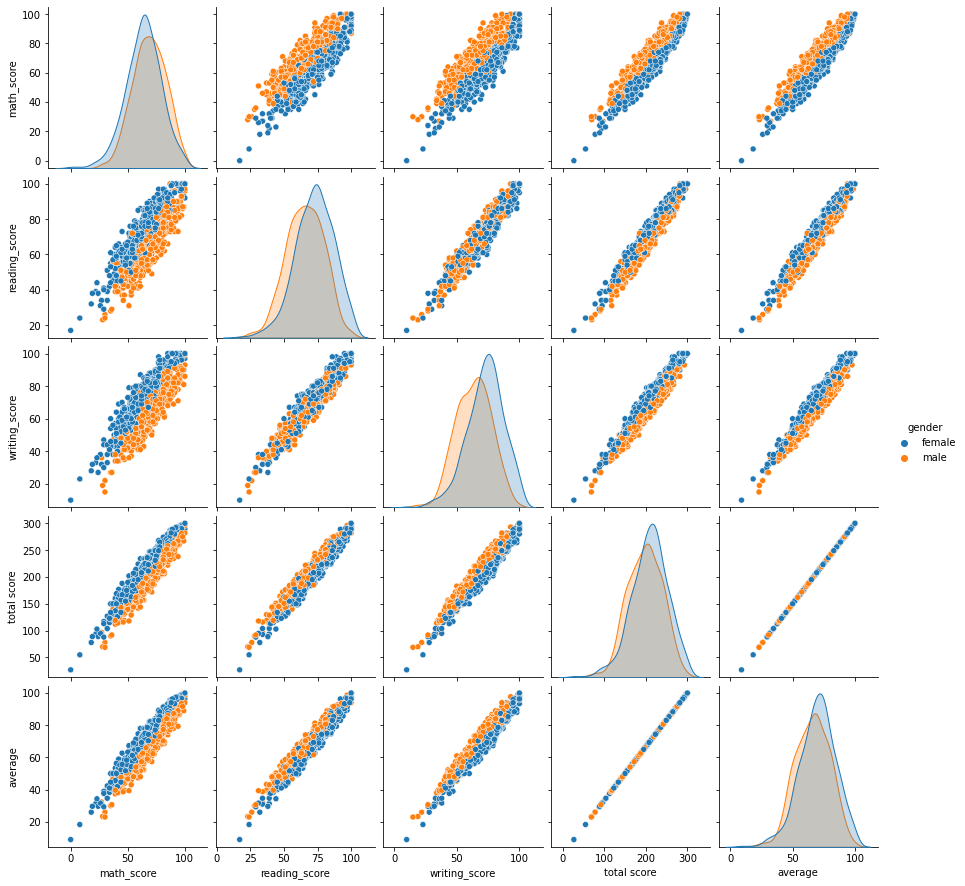

In [29]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

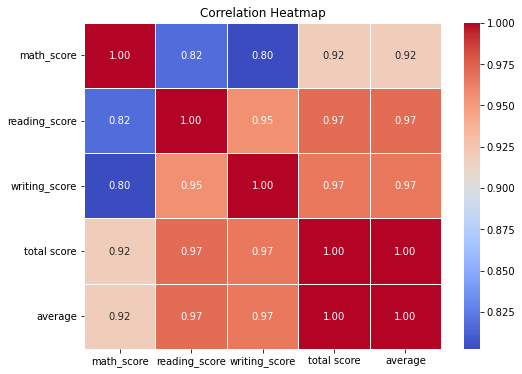

In [30]:
# Correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#####  Insights
- Reading are writing seems to be strongly coorrelated to each other
- weak relationship betweeen reading/writing to math score
- total score and average fileds are calculated field, we can ignore any observations

In [31]:
X = df.drop(columns=['total score', 'math_score', 'average'],axis=1)
y = df['math_score']

In [32]:
# Create Column Transformer with 3 types of transformers

# LR model is sensitive to the scale of the input data so Without scaling, the model might treat fields with higher values as more important just because the numbers are bigger which will not be correct

num_features = X.select_dtypes(exclude="object").columns # Gets columns which are numeric
cat_features = X.select_dtypes(include="object").columns # Gets columns which are categorical

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()  #StandardScaling is applied to numerical columns
oh_transformer = OneHotEncoder() #OneHotEncoding is applied to categorical columns to convert them to numerical format so that LR modelcan work with it

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)


In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 29.095169866715516
Mean Absolute Error: 4.214763142474852
R² Score: 0.8804332983749564


#####  Insights
This  model is performing very well with Relatively low error and  And high accuracy (R² = 0.88)

In [36]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


#####  Insights
This means that the regression model is able to explain approximately 88% of the variability in student performance based on the features provided (such as gender, parental education, test preparation, etc.).

An R² score of 0.8804 indicates a strong predictive power, suggesting the model is doing a good job in capturing the relationship between input features and the target variable (e.g., test scores).

In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


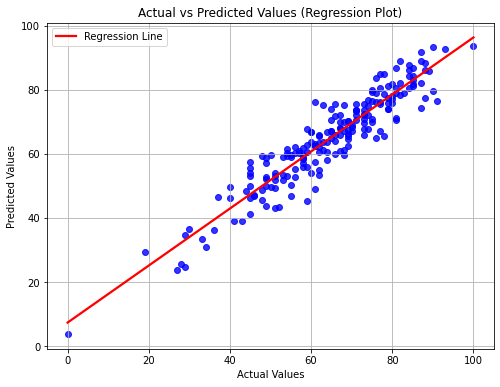

In [38]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, color='blue', ci=None, line_kws={'color': 'red', 'label': 'Regression Line'})

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Regression Plot)')
plt.legend()
plt.grid(True)
plt.show()